In [1]:
'''
ASSIGNMENT 2

NAME- JOEL V JOSEPH

ROLL NO- 17510031

M.Sc Cognitive Science
'''

'\nASSIGNMENT 2\n\nNAME- JOEL V JOSEPH\n\nROLL NO- 17510031\n\nM.Sc Cognitive Science\n'

In [2]:
import math
import random
import itertools
import numpy as np
from statistics import mean
from matplotlib import style
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
def msplit(docs, sep):
    if type(docs)!=type([]):
        doc=[docs]
    for char in sep:
        words = []
        for strings in docs:
            words.extend(strings.split(char))
        docs = words
    return docs

def inverse_dict(d):
    invr_dict={}
    for key in d:
        check = invr_dict.get(d[key],0)
        if check==0:
            invr_dict[d[key]] = [key]
        else:
            invr_dict[d[key]].append(key)
    return invr_dict

def histogram(word_list):
    # word_list=list(s.split())
    word_dict= {}
    for word in word_list:
        word_dict[word]= word_dict.get(word,0)+1
    return word_dict

def word_freq_descending(L):
    d1={}
    for word in L:
        d1[word] = d1.get(word,0) + 1
    inverse_d1= inverse_dict(d1)
    sorted_freq=list(inverse_d1.keys())
    sorted_freq.sort()
    sorted_freq=sorted_freq[::-1]
    Final_list=[]
    for freq in sorted_freq:
        repeat= freq
        for word in inverse_d1[freq]:
            for i in range(repeat):
                Final_list.append(word)
    word_dict=histogram(Final_list)
    return word_dict

def count_vocab(list_words):
    N = []
    i=0
    V=[]
    v = set()
    for word in words:
        i=i+1
        if word not in V:
            v.add(word)
        V.append(len(v))
        N.append(i)
        #print("Computing Vocab "+ str(int(i/len(words)*100))+"%"+" complete")
    return N,V

In [4]:
# Answer 1 + 2 

In [5]:
'''
Importing Alice in Wonderland and segmenting each word into list and creating a word frequency dictonary
'''

#Read the doc
file = open("Alice_in_Wonderland.txt", 'r')
doc=file.read()
file.close()


# Replace new line character and "* with " "
def char_replace(doc,chars):
    for char in chars:
        while char in doc:
            doc = doc.replace(char," ")
    return doc



# Remove unnecesaary symbols
def char_remove(docs,sep):
    new_doc=[None]*len(docs)
    
    if type(docs)!=type([]):
        doc=[docs]
        
    for i in range(0,len(sep)):
        char=sep[i]
        for j in range(0,len(docs)):
            if i ==0:
                new_doc[j]=docs[j].replace(char,"")
            else:
                new_doc[j]=new_doc[j].replace(char,"")

    return new_doc
# tokenize document into sentences + remove unnecessary symbols
doc=char_replace(doc,("\n","*"))

sent_tokenize_list = sent_tokenize(doc)
sepraters=["\n",",","(",")","--","\"","[","]","!","?","_",".",";",":","”","“","*",",","‘",",","’"]
sentences=char_remove(sent_tokenize_list,sepraters)
sentences=list(filter(lambda x: x != "", sentences))

# mark start<s> and end</s> of sentences
def strt_end_mark(sentences):
    i=0
    for sentence in sentences:
        new_sent= "<s> "+sentence+" </s>"
        sentences[i]=new_sent
        i+=1
    return sentences
sentences=strt_end_mark(sentences)


#split the doc into 80 train and 20 test
random.seed(25)
data=random.sample(sentences,len(sentences))
train_data=data[:782]
test_data=data[782:]

In [6]:
# Answer 3

In [7]:
# Unigram MLE Prob
words=msplit(train_data,(" "))
words=list(filter(lambda x: x != "", words))


unigram_dict=word_freq_descending(words)
N= len(list(unigram_dict.keys()))
V= sum(unigram_dict.values())
unigram_MLE={}
for key,value in unigram_dict.items():
    unigram_MLE[key]=value/N


print("Length of Vocabulary: ", V)
print("Tokens: ", N, "\n")

# spliting sentences into n grams provided n (2- for bigram , 3- for tigram)
def n_gram_split(sent,n):
    n_grams=[]
    if n<=1:
        print("Use msplit with \"\" ")
        return None
    if type(sent)!=type([]):
        sent=[sent]
    words=msplit(sent,(" "))
    words=list(filter(lambda x: x != "", words))
    for i in range(0,len(words)-(n-1)):
        n_gram=[]
        for j in range(0,n):
            n_gram.append(words[i+j])
        n_grams.append(" ".join(n_gram))
    n_grams=list(filter(lambda x: "</s> <s>" not in x, n_grams))
    return n_grams

# Bigram MLE Prob
bigrams=n_gram_split(train_data,2)

bigram_dict=word_freq_descending(bigrams)

bigram_MLE={}
for key,value in bigram_dict.items():
    word_1, word_2=key.split(" ")
    bigram_MLE[key]=value/unigram_dict[word_1]

print("Number of Actual Bigrams: ",len(bigrams))
poss=int(N*(N-1))
print("Number of Possible Bigrams: ",poss)
print("Percentage of Bigrams in the document: ",len(bigrams)/poss*100,"\n")

# Trigrams MLE Prob
trigrams=n_gram_split(train_data,3)

trigram_dict=word_freq_descending(trigrams)


trigram_MLE={}
for key,value in trigram_dict.items():
    word_1, word_2, word_3=key.split(" ")
    trigram_MLE[key]=value/bigram_dict.get(word_1+" "+word_2)

print("Number of Actual Trigrams: ",len(trigrams))
poss=int(N*(N-1)*(N-2))
print("Number of Possible Trirams: ",poss)
print("Percentage of Trigrams in the document: ",len(trigrams)/poss*100,"\n")

# Quadgrams MLE Prob
quadgrams=n_gram_split(train_data,4)

quadgram_dict=word_freq_descending(quadgrams)


quadgram_MLE={}
for key,value in quadgram_dict.items():
    word_1, word_2, word_3, word_4=key.split(" ")
    quadgram_MLE[key]=value/trigram_dict.get(word_1+" "+word_2+" "+word_3)
    
print("Number of Actual Quadgrams: ",len(quadgrams))
poss=int(N*(N-1)*(N-2)*(N-3))
print("Number of Possible Quadrams: ",poss)
print("Percentage of Quadgrams in the document: ",len(quadgrams)/poss*100,"\n")



Length of Vocabulary:  22622
Tokens:  2828 

Number of Actual Bigrams:  21840
Number of Possible Bigrams:  7994756
Percentage of Bigrams in the document:  0.2731790688796506 

Number of Actual Trigrams:  21058
Number of Possible Trirams:  22593180456
Percentage of Trigrams in the document:  9.320511576938117e-05 

Number of Actual Quadgrams:  20276
Number of Possible Quadrams:  63825734788200
Percentage of Quadgrams in the document:  3.176775021436744e-08 



In [8]:
# Answer 4 a

In [9]:
def generator(model_name):
    if type(model_name)==dict:
        sent="<s>"
        last_word="<s>"
        last_words=""
        while last_word!="</s>":
            n_gram=list(model_name.keys())
            if len(n_gram[0].split(" "))>1:
                n_gram=[gram for gram in n_gram if last_words in " ".join(gram.split(" ")[:len(gram.split(" "))-1])]
                n_gram_prob=[model_name[x] for x in n_gram]
                words=str(random.choices(n_gram,n_gram_prob)[0])
                words_in_n_gram=words.split(" ")

                while last_word==words_in_n_gram[-1]:
                    print("wait")
                    n_gram=list(model_name.keys())
                    n_gram=[gram for gram in n_gram if last_words in gram]
                    n_gram_prob=[model_name[x] for x in n_gram]
                    words=str(random.choices(n_gram,n_gram_prob)[0])
                    words_in_n_gram=words.split(" ")
            else:
                n_gram.remove("<s>")
                n_gram_prob= [model_name[x] for x in n_gram]
                words=str(random.choices(n_gram,n_gram_prob)[0])
                words_in_n_gram=[words]

            if len(words_in_n_gram)>1:
                last_words=" ".join(words_in_n_gram[1:len(words_in_n_gram)])
                last_word=words_in_n_gram[-1]
            else:
                last_words=words
                last_word=words
            
            
            
            if len(sent.split(" "))==1:
                sent=sent+" "+last_words
            else:
                sent=sent +" "+last_word
        return sent
    
    else:
        print("Model must be a dictonary of n-gram probabilities")
        return None

In [10]:
# 
# Model Name= dictonary containing probility value
#     unigram_MLE - for unigram
#     bigram_MLE - for bigram
#     bigram_add_1 - for bigram add1 smoothed
#     trigram_MLE - for trigram
#     quadgram_MLE - for quadgram

# uncomment and provide model_name to use

# print(generator(model_name))

In [11]:
# Answer 4 b

In [12]:
def probability(sentence,model_name):
    if type(sentence)!=type(" "):
        print("Enter sentence")
        return None
            
    words=sentence.split(" ")
    words=list(filter(lambda x: x != "", words))
    prob=0
    N_grams=[]
    if type(model_name)==dict:
        model_gram=list(model_name.keys())
        n=len(model_gram[0].split(" "))
        
        if len(words)<n:
            print("Sentence too small to use on this specific model_name")
            return None
        
        if n==1:
            N_grams=words
            for gram in N_grams:
                gram_prob=model_name.get(gram,0)
                if gram_prob>0:
                    prob=prob+math.log(gram_prob)
            return prob

        elif n==2:
            for i in range(0,len(words)-(n-1)):
                n_gram=[]
                for j in range(0,n):
                    n_gram.append(words[i+j])
                N_grams.append(" ".join(n_gram))
            for gram in N_grams:
                gram_prob=model_name.get(gram,0)
                if gram_prob>0:
                    prob=prob+math.log(gram_prob)
            word_1=N_grams[0].split(" ")[1]
            word_1_uni=unigram_MLE.get(word_1,0)
            if word_1_uni!=0:
                word_1_prob=math.log(word_1_uni)
            else:
                word_1_prob=0
            prob=prob+word_1_prob

            return prob

        elif n==3:
            for i in range(0,len(words)-(n-1)):
                n_gram=[]
                for j in range(0,n):
                    n_gram.append(words[i+j])
                N_grams.append(" ".join(n_gram))
            for gram in N_grams:
                gram_prob=model_name.get(gram,0)
                if gram_prob>0:
                    prob=prob+math.log(gram_prob)

            word_1=N_grams[0].split(" ")[1]
            word_1_uni=unigram_MLE.get(word_1,0)
            word_1_prob=math.log(word_1_uni)

            word_1_2=" ".join([N_grams[0].split(" ")[1],N_grams[0].split(" ")[2]])
            word_1_2_bi=bigram_MLE.get(word_1_2,0)
            word_1_2_prob=math.log(word_1_2_bi)

            prob=prob+word_1_prob+word_1_2_prob

            return prob

        elif n==4:
            for i in range(0,len(words)-(n-1)):
                n_gram=[]
                for j in range(0,n):
                    n_gram.append(words[i+j])
                N_grams.append(" ".join(n_gram))
            prob=0
            for gram in N_grams:
                gram_prob=model_name.get(gram,0)
                if gram_prob>0:
                    prob=prob+math.log(gram_prob)

            word_1=N_grams[0].split(" ")[1]
            word_1_uni=unigram_MLE.get(word_1,0)
            word_1_prob=math.log(word_1_uni)

            word_1_2=" ".join([N_grams[0].split(" ")[1],N_grams[0].split(" ")[2]])
            word_1_2_bi=bigram_MLE.get(word_1_2,0)
            word_1_2_prob=math.log(word_1_2_bi)

            word_1_2_3=" ".join([N_grams[0].split(" ")[1],N_grams[0].split(" ")[2],N_grams[0].split(" ")[3]])
            word_1_2_3_tri=trigram_MLE.get(word_1_2_3,0)
            word_1_2_3_prob=math.log(word_1_2_3_tri)
            prob=prob+word_1_prob+word_1_2_prob+word_1_2_3_prob

            return prob
        
        else:
            print("Cant process more than quadgram due to non-inclusion of chain rule probabilities")
            
    
    else:
        print("Model must be a dictonary of n-gram probabilities")
        return None


In [13]:

# Model Name= dictonary containing probility value
#     unigram_MLE - for unigram
#     bigram_MLE - for bigram
#     bigram_add_1 - for bigram add1 smoothed
#     trigram_MLE - for trigram
#     quadgram_MLE - for quadgram

# uncomment and provide model_name and sentence to use

#sentence=""

# print(probability(sentence,model_name))

In [14]:
# all possible bigrams
items=list(unigram_dict.keys())
all_bigrams=list(itertools.permutations(items,2))

all_bigrams=[" ".join(x) for x in all_bigrams]

# Add the multiple occurence of possible bigrams to the permutation
all_bigrams.extend(bigrams)

all_bigram_dict=word_freq_descending(all_bigrams)
for key,value in all_bigram_dict.items():
    all_bigram_dict[key]=value-1


In [15]:
# Answer 5

In [16]:
# Bigram Add 1 Prob

bigram_add_1={}
for key,value in all_bigram_dict.items():
    word_1, word_2=key.split(" ")
    bigram_add_1[key]=(value+1)/(unigram_dict.get(word_1)+V)


diff_dict={}
for key in bigram_add_1.keys():
    diff_dict[key]=abs(bigram_MLE.get(key,0)-bigram_add_1[key])



In [17]:
from tabulate import tabulate

print("Examples\n")
table=[
    ['the and',bigram_MLE.get("the and",0),bigram_add_1["the and"],diff_dict["the and"]],
    ['<s> lamps',bigram_MLE.get("<s> lamps",0),bigram_add_1["<s> lamps"],diff_dict["<s> lamps"]],
    ['and faintly',bigram_MLE.get("and faintly",0),bigram_add_1["and faintly"],diff_dict["and faintly"]],
    ['said the',bigram_MLE["said the"],bigram_add_1["said the"],diff_dict["said the"]],
    ['of the',bigram_MLE["of the"],bigram_add_1["of the"],diff_dict["of the"]],
    ['said Alice',bigram_MLE["said Alice"],bigram_add_1["said Alice"],diff_dict["said Alice"]]
      ]

print (tabulate(table, headers=['Bigram','Prob before smoothing','Prob after add1 smoothing','Abs Difference'],tablefmt='orgtbl'))
answer="This drastic change in effective count and probability before and after smoothing \
because in add 1 smoothing no weightage is given to more frequent occuring bigrams, and thus \
while distributing the probability density function to unseen bigram such drastic changes occur. \
\nIn other words this smoothing technique takes away too much probability mass from seen events and \
assigns too much total probability mass to unseen events. For example \nBefore smoothing \'the </s>\' probability= "+str(bigram_MLE.get("the </s>",0)) +"\n" + "After \
smoothing \'the </s>\' probability= "+str(bigram_add_1["the </s>"])+ " which is more than without smoothing."

print("\n"+answer+"\n")

Examples

| Bigram      |   Prob before smoothing |   Prob after add1 smoothing |   Abs Difference |
|-------------+-------------------------+-----------------------------+------------------|
| the and     |                 0       |                 4.19463e-05 |      4.19463e-05 |
| <s> lamps   |                 0       |                 4.27277e-05 |      4.27277e-05 |
| and faintly |                 0       |                 4.307e-05   |      4.307e-05   |
| said the    |                 0.45082 |                 0.00722116  |      0.443599    |
| of the      |                 0.26817 |                 0.00469137  |      0.263479    |
| said Alice  |                 0.26776 |                 0.00430659  |      0.263453    |

This drastic change in effective count and probability before and after smoothing because in add 1 smoothing no weightage is given to more frequent occuring bigrams, and thus while distributing the probability density function to unseen bigram such drastic chan

In [18]:
# Answer 6

In [19]:
rvrs_bigram_dict=inverse_dict(all_bigram_dict)
bigram_Nc={}
for key, value in rvrs_bigram_dict.items():
    bigram_Nc[key]=len(value)
adj_bigram_count={}
for i in range(10,0,-1):
    adj_bigram_count[i]=bigram_Nc[i+1]*(i+1)/bigram_Nc[i]


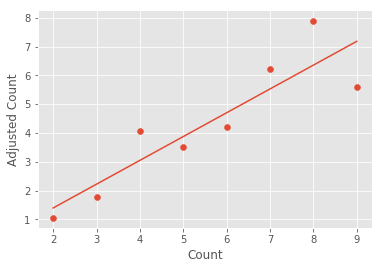

Since slope of the line for differences is not 1 there cannot be a constant d value but it will be a function of c. 
So c*=c-d(c) 
where d(c)=m*c+i where m= 0.8260433906216884 and i= -0.25426898002055953


In [20]:
# finding d for n- 2 to 9
# removed 10 as outlier

keys=list(adj_bigram_count.keys())
keys=keys[8:0:-1]
values=list(adj_bigram_count.values())
values=values[8:0:-1]

style.use('ggplot')
xs = np.array(keys, dtype=np.float64)
ys = np.array(values, dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, i = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+i for x in xs]

plt.scatter(keys,values)
plt.plot(xs, regression_line)
plt.xlabel("Count")
plt.ylabel("Adjusted Count")

plt.show()

print("Since slope of the line for differences is not 1 there cannot be a constant d value but\
 it will be a function of c. \nSo c*=c-d(c) \nwhere d(c)=m*c+i where m=",m,"and i=",i)

In [21]:
def d(x):
    y=m*x+b
    return y

for key, value in bigram_Nc.items():
    if key not in [0,1]:
        bigram_Nc[key]=m*value+i
    else:
        continue


In [22]:
# Bigram Good Turing Prob 
bigram_good_tur={}
for key in rvrs_bigram_dict.keys():
    for word in rvrs_bigram_dict[key]:
        bigram_good_tur[word]=bigram_Nc[key]/N

In [23]:
# Answer 7

In [24]:
def perplexity(data, model_name):
    if type(data)!=type([]):
        print("Data must be a list of sentences")
        return None
    if type(data[0])!=type(" "):
        print("Each item in list must be a sentence")
    
    n_sent=len(data)
    perplexity=0
    if type(model_name)==dict:
        
        for sent in data:
            word_list=sent.split(" ")
            N_grams=[]
            
            for i in range(len(word_list)-1):
                n_gram=[]
                for j in range(0,2):
                    n_gram.append(words[i+j])
                N_grams.append(" ".join(n_gram))
            N=0
            sent_perplexity=1
            
            for bigram in N_grams:
                N+=1
                sent_perplexity=sent_perplexity*(1/model_name.get(bigram))
            sent_perplexity=pow(sent_perplexity, 1/float(N))
            
            if float("Inf")!=float(sent_perplexity):
                perplexity=perplexity+sent_perplexity
        
        perplexity=perplexity/n_sent
        
        return perplexity
    
    else:
        print("Model must be a dictonary of n-gram probabilities")
        return None
           

In [25]:
# Perplexity of Add_1 bigram model and good turing bigram trained on test_data
add_1_perplexity=perplexity(test_data,bigram_add_1)
gd_turing_perplexity=perplexity(test_data,bigram_good_tur)



In [26]:
print (tabulate([["Bigram Add 1",add_1_perplexity],["Bigram Good Turing",gd_turing_perplexity]], headers=['Model','Perplexity'],tablefmt='orgtbl'))
test_bigrams=n_gram_split(test_data,2)
answer="Models are trained on "+str(len(bigrams))+" bigrams and perplexity is calculated on "+str(len(test_bigrams))+"\
. As it can be seen from the table the perplexity of the Good Turing somotthing is much lower than that of Add 1 \
. Hence Good Turing is a better model among the two."

print("\n"+answer+"\n")

| Model              |   Perplexity |
|--------------------+--------------|
| Bigram Add 1       |   5517.86    |
| Bigram Good Turing |      3.64232 |

Models are trained on 21840 bigrams and perplexity is calculated on 5526. As it can be seen from the table the perplexity of the Good Turing somotthing is much lower than that of Add 1 . Hence Good Turing is a better model among the two.

